In [ ]:
# 3 different thresholds
# absolute value for x and for y
# overall magnitude of the gradient, for both x and y
# direction of the gradient

# third one is mandatory, not sure if I need both one and two

In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0,255)):
    # calculate directional gradient
    if orient=='x':
        sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # get absolute value
    abs_sobel = np.absolute(sobel)
    # scale it
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))    
    # create binary mask and apply threshold
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel>=thresh[0]) & (scaled_sobel<=thresh[1])] = 1    

    return grad_binary

def mag_thresh(img, sobel_kernel=3, thresh=(0,255)):
    # calculate gradient magnitude
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    grad_mag = np.sqrt(sobelx**2 + sobely**2)
    # scale it
    scaled_sobel = np.uint8(255*grad_mag/np.max(grad_mag))    
    # create binary mask and apply threshold
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel>=thresh[0]) & (scaled_sobel<=thresh[1])] = 1    

    return grad_binary

def dir_thresh(img, sobel_kernel=3, thresh=(0,np.pi/2)):
    # calculate sobel
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # calculate gradient direction
    grad_dir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    # create binary mask and apply threshold
    grad_binary = np.zeros_like(grad_dir)
    grad_binary[(grad_dir>=thresh[0]) & (grad_dir<=thresh[1])] = 1
    
    return grad_binary


In [5]:
# choose a sobel kernel size
ksize = 3 # choose a larger odd number to smooth gradient measurements
img = mpimg.imread('signs_vehicles_xygrad.png')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# apply each of the thresholding functions
gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(35,60))
grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(40,80))
mag_binary = mag_thresh(gray, sobel_kernel=ksize, thresh=(60,90))
dir_binary = dir_thresh(gray, sobel_kernel=15, thresh=(.9,1.1))

combined = np.zeros_like(gray)
#combined[(gradx == 1) & (grady == 1) & (mag_binary == 1) & (dir_binary ==1)] = 1
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary ==1))] = 1


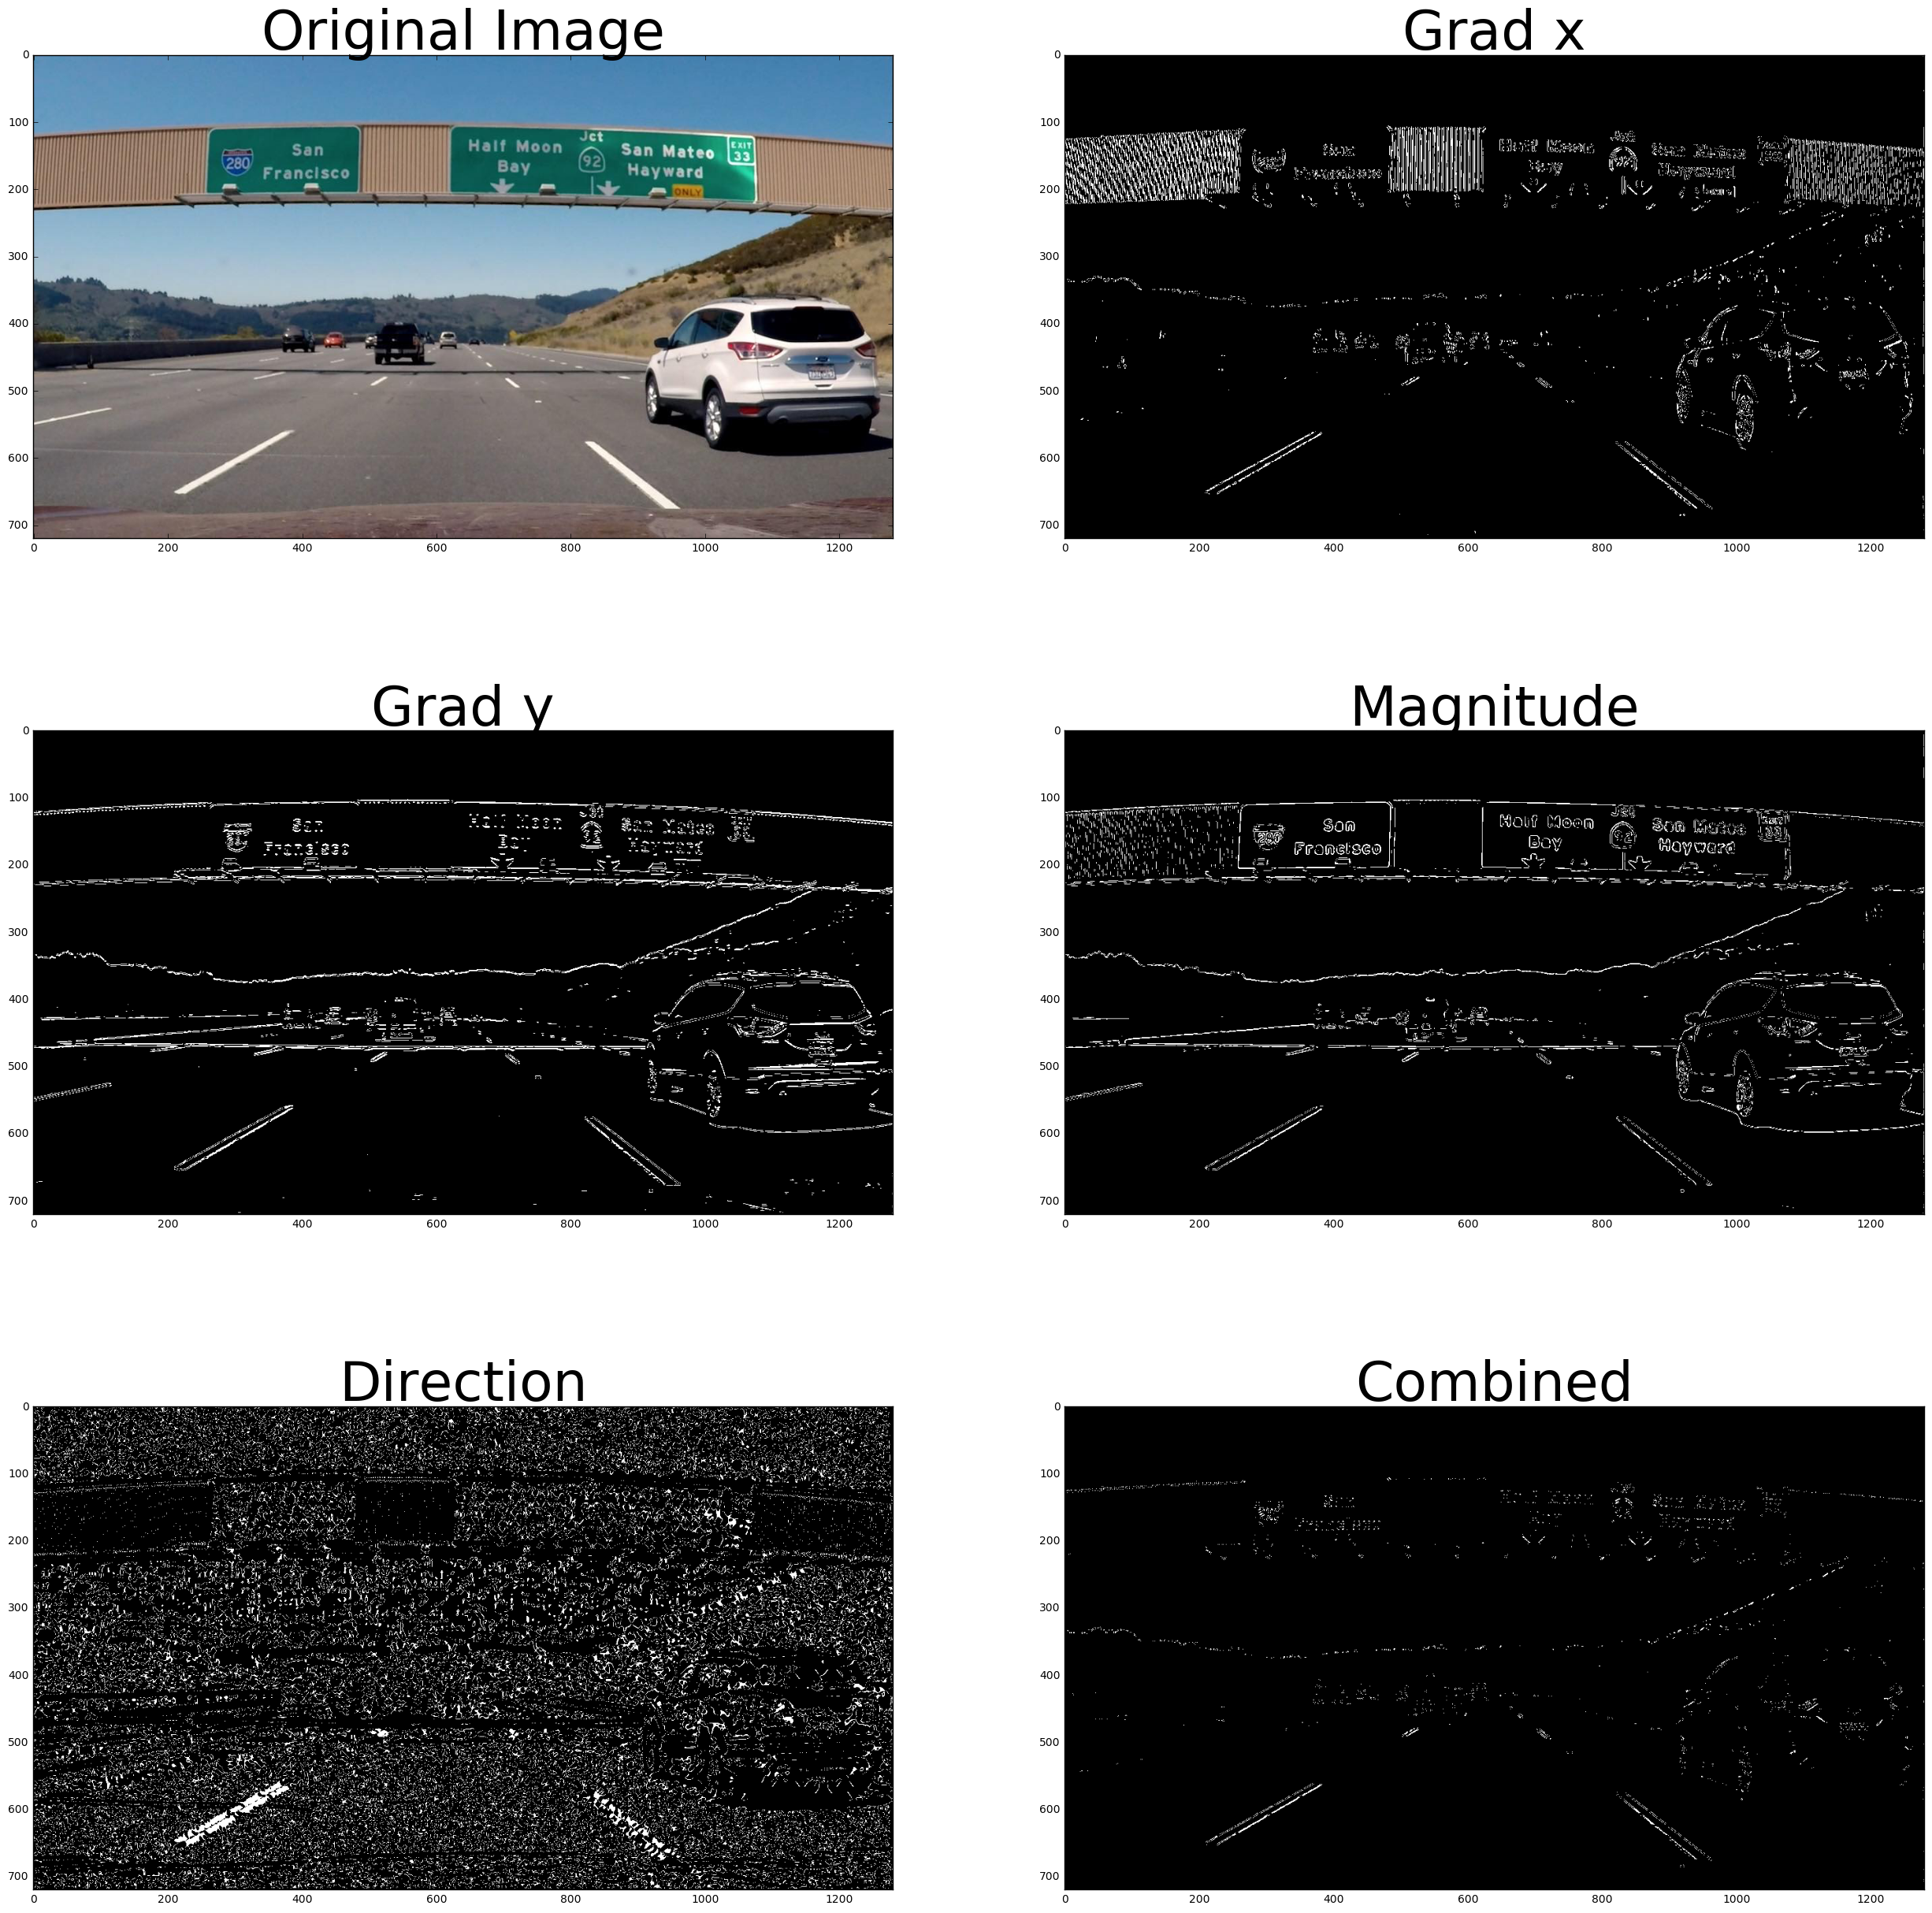

In [6]:
# plot the results
f, plots = plt.subplots(3,2,figsize=(24,27)) # plot - row, col
plots[0][0].imshow(img)
plots[0][0].set_title('Original Image', fontsize=50)
plots[0][1].imshow(gradx, cmap='gray')
plots[0][1].set_title('Grad x', fontsize=50)
plots[1][0].imshow(grady, cmap='gray')
plots[1][0].set_title('Grad y', fontsize=50)
plots[1][1].imshow(mag_binary, cmap='gray')
plots[1][1].set_title('Magnitude', fontsize=50)
plots[2][0].imshow(dir_binary, cmap='gray')
plots[2][0].set_title('Direction', fontsize=50)
plots[2][1].imshow(combined, cmap='gray')
plots[2][1].set_title('Combined', fontsize=50)

plt.subplots_adjust(left=0., right=1., top=.9, bottom=0.)

In [128]:
# if gradx AND grady are within threshold
# OR gradient magnitude AND gradient direction are within threshold
# set it to 1
# combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary ==1))] = 1
